In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
X = np.random.randn(2,100)
y = 1*(X[0,:]*X[1,:]>0)
y = y.reshape(1,-1)

In [46]:
print(y.shape)

(1, 100)


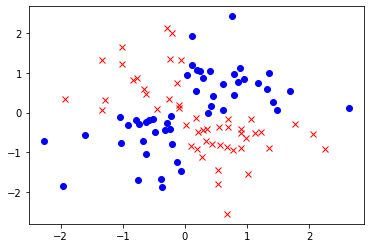

In [47]:
for i in range(X.shape[1]):
    if y[0,i]>0:
        plt.plot(X[0,i],X[1,i] ,'bo')
        
    else:
        plt.plot(X[0,i],X[1,i] ,'rx')
        

In [48]:
print(X.shape)

(2, 100)


In [49]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))


def get_loss(yhat, y):
    return np.sum( -y*np.log(yhat) - (1-y)*np.log(1-yhat), axis =1)

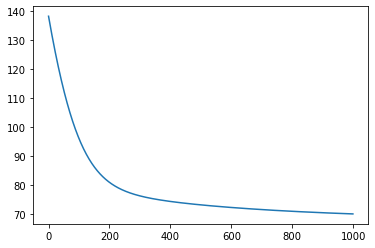

In [50]:
# number of hidden units is 10
W1 = np.random.randn(10,2)
b1 = np.zeros((10,1))

W2 = np.random.randn(1, 10)
b2 = np.zeros((1,1))


lr = 0.0001
ls = []
for i in range(1000):
    #forward pass
    Z1 = W1@X + b1
    A1 = sigmoid(Z1)
    
    Z2 = W2@A1 + b2
    A2 = sigmoid(Z2)
    ls.append(get_loss(A2,y))
    # backward pass
    # dZ2 = dJ/dZ2
    dZ2 = A2- y
    dW2 = dZ2 @ A1.T
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = W2.T@ dZ2 * A1*(1-A1)
    dW1 = dZ1 @ X.T
    db1 = np.sum(dZ1, axis = 1, keepdims = True)
    
    W1 = W1 -lr*dW1
    b1 = b1 - lr*db1
    W2 = W2 -lr*dW2
    b2 = b2 -lr*db2
    
plt.plot(ls)
    
    

In [31]:
print(y.shape)

(2, 100)
